In [2]:
# No início do notebook 02-analise-exploratoria.ipynb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Carregar o DataFrame limpo
caminho_parquet = os.path.join('..', 'data', 'processed', 'enem_limpo.parquet')
df_limpo = pd.read_parquet(caminho_parquet)

print("DataFrame carregado. Dimensões:", df_limpo.shape)
display(df_limpo.head())

DataFrame carregado. Dimensões: (2585115, 14)


,NU_INSCRICAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
2,210061103945,1,502.0,498.9,475.6,363.2,1,700.0,H,E,C,A,A,B
3,210060214087,2,459.0,508.5,507.2,466.7,0,880.0,D,D,C,D,A,B
4,210059980948,2,402.5,379.2,446.9,338.3,0,560.0,B,B,B,B,A,A
9,210060801601,1,564.7,630.3,610.4,680.2,0,600.0,H,E,F,C,B,B
10,210059085130,1,644.9,620.2,626.9,736.3,0,860.0,F,C,B,E,B,B


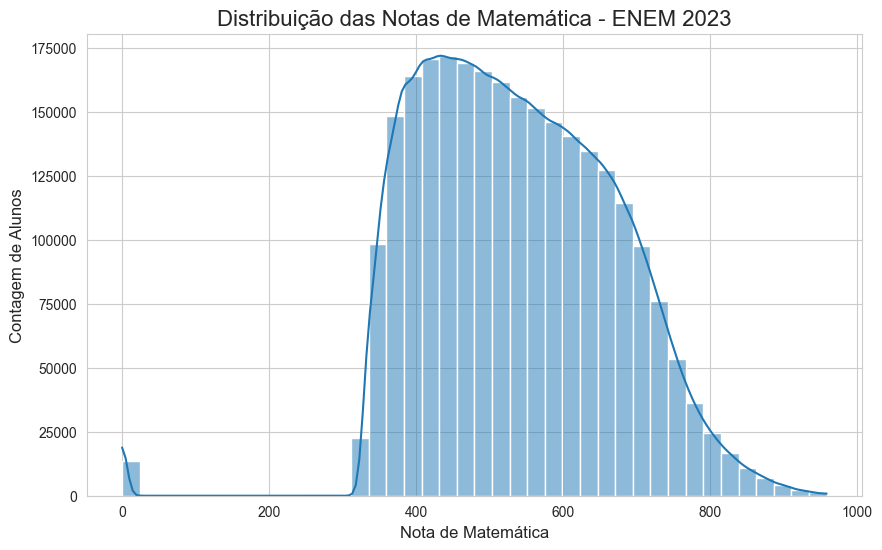

In [3]:
# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Histograma da nota de Matemática
sns.histplot(df_limpo, x='NU_NOTA_MT', bins=40, kde=True)

plt.title('Distribuição das Notas de Matemática - ENEM 2023', fontsize=16)
plt.xlabel('Nota de Matemática', fontsize=12)
plt.ylabel('Contagem de Alunos', fontsize=12)
plt.show()

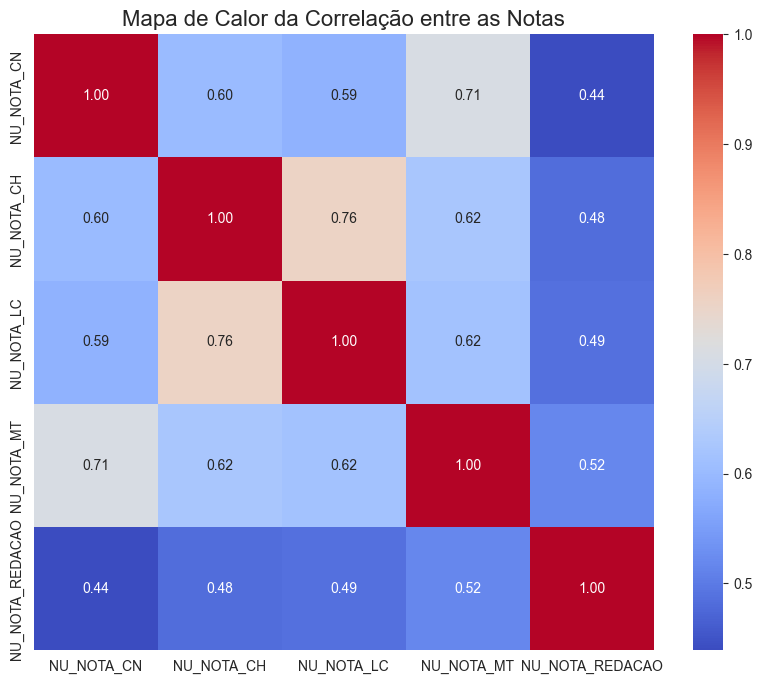

In [4]:
# Selecionar apenas as colunas de notas para a correlação
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
matriz_correlacao = df_limpo[colunas_notas].corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Mapa de Calor da Correlação entre as Notas', fontsize=16)
plt.show()

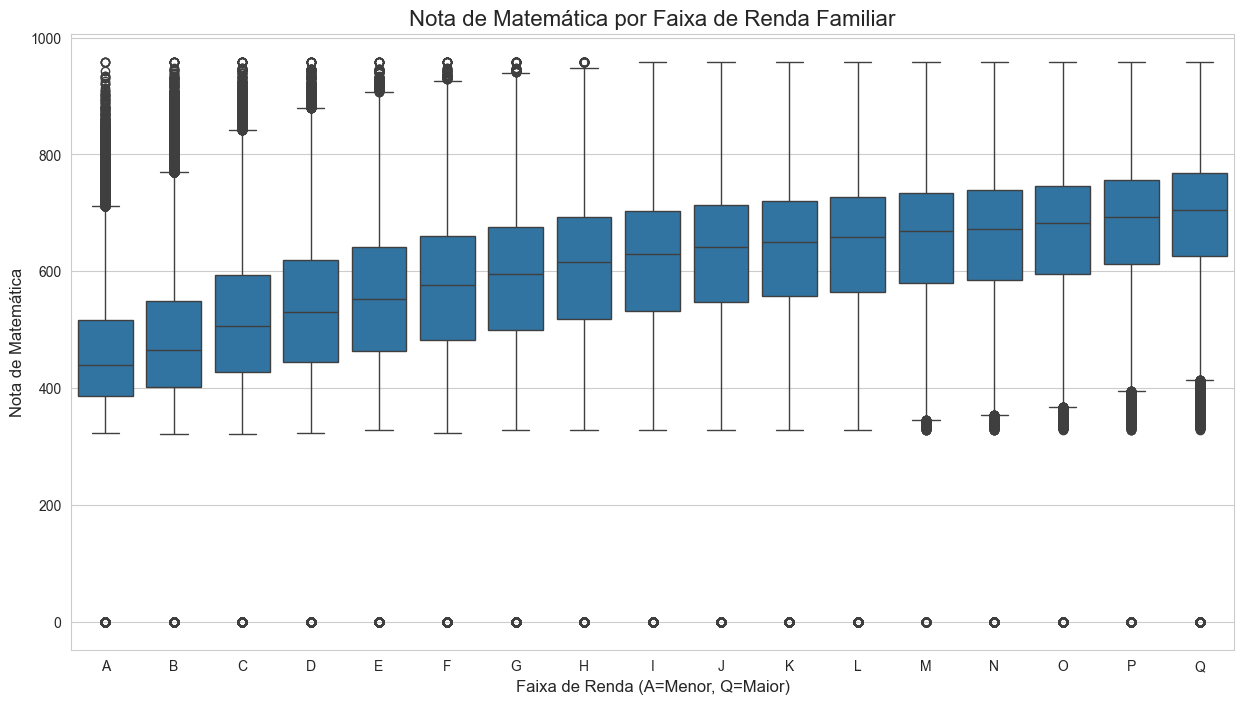

In [5]:
# Primeiro, definimos a ordem correta das categorias de renda (do dicionário de variáveis)
ordem_renda = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']

plt.figure(figsize=(15, 8))

# Boxplot para visualizar a distribuição das notas por faixa de renda
sns.boxplot(data=df_limpo, x='Q006', y='NU_NOTA_MT', order=ordem_renda)

plt.title('Nota de Matemática por Faixa de Renda Familiar', fontsize=16)
plt.xlabel('Faixa de Renda (A=Menor, Q=Maior)', fontsize=12)
plt.ylabel('Nota de Matemática', fontsize=12)
plt.show()

In [6]:
# Criando uma cópia para não alterar o dataframe limpo original
df_decoded = df_limpo.copy()

# Dicionário para TP_ESCOLA
map_escola = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
}

# Dicionário para Q025 (Acesso à Internet)
map_sim_nao = {
    'A': 'Não',
    'B': 'Sim'
}

# Aplicando os mapas nas respectivas colunas
df_decoded['TP_ESCOLA_DECODED'] = df_decoded['TP_ESCOLA'].map(map_escola)
df_decoded['Q025_DECODED'] = df_decoded['Q025'].map(map_sim_nao)


# Exibindo as primeiras linhas com as novas colunas decodificadas
print("Dataset com colunas decodificadas:")
display(df_decoded[['TP_ESCOLA', 'TP_ESCOLA_DECODED', 'Q025', 'Q025_DECODED']].head())

Dataset com colunas decodificadas:


,TP_ESCOLA,TP_ESCOLA_DECODED,Q025,Q025_DECODED
2,1,Não Respondeu,B,Sim
3,2,Pública,B,Sim
4,2,Pública,A,Não
9,1,Não Respondeu,B,Sim
10,1,Não Respondeu,B,Sim


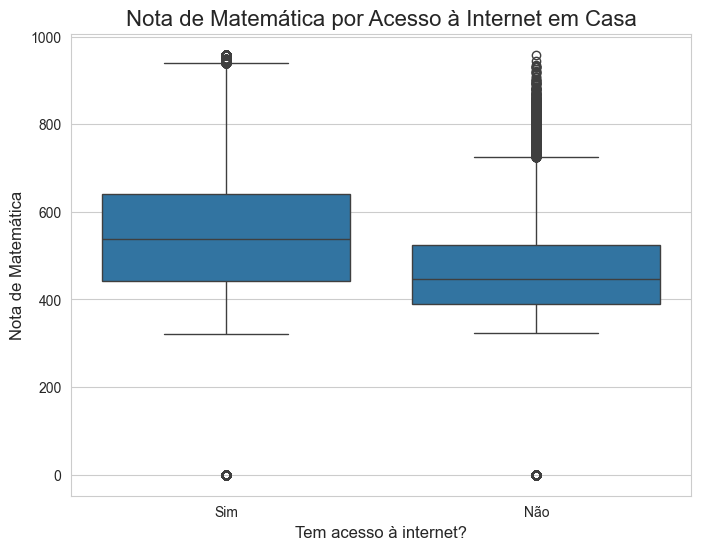

In [7]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_decoded, x='Q025_DECODED', y='NU_NOTA_MT', order=['Sim', 'Não'])

plt.title('Nota de Matemática por Acesso à Internet em Casa', fontsize=16)
plt.xlabel('Tem acesso à internet?', fontsize=12)
plt.ylabel('Nota de Matemática', fontsize=12)
plt.show()

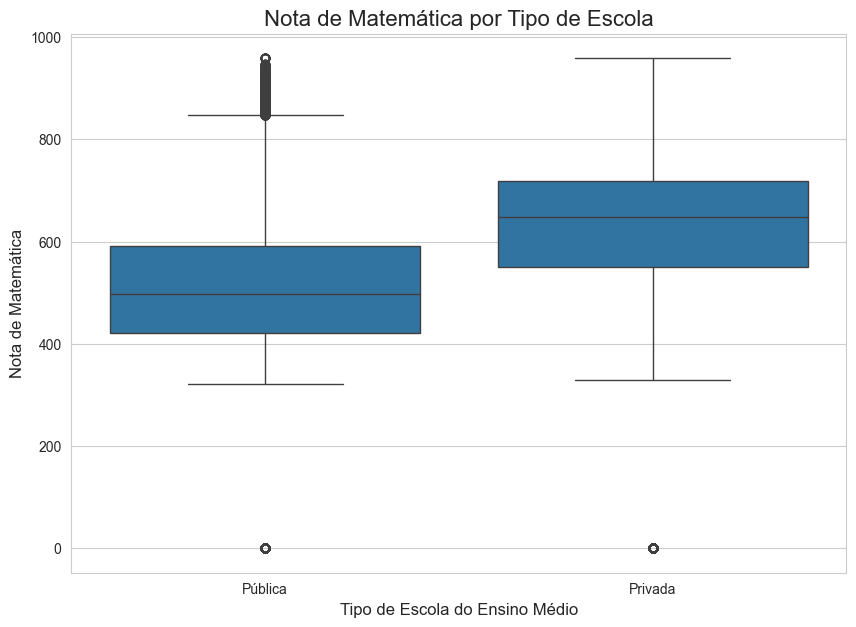

In [8]:
plt.figure(figsize=(10, 7))

# Vamos focar apenas em alunos de escolas Públicas e Privadas
df_filtrado_escola = df_decoded[df_decoded['TP_ESCOLA_DECODED'].isin(['Pública', 'Privada'])]

sns.boxplot(data=df_filtrado_escola, x='TP_ESCOLA_DECODED', y='NU_NOTA_MT', order=['Pública', 'Privada'])

plt.title('Nota de Matemática por Tipo de Escola', fontsize=16)
plt.xlabel('Tipo de Escola do Ensino Médio', fontsize=12)
plt.ylabel('Nota de Matemática', fontsize=12)
plt.show()